<p><img height="40px" src="https://static.thenounproject.com/png/103883-200.png" align="left" hspace="10px"></p>
<h1>Исследование причин неявки к врачу</h1>

Датасет с kaggle https://www.kaggle.com/joniarroba/noshowappointments


##Загрузка необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

##Загрузка датасета

Предварительно датасет был загружен на GitHub, для удобства доступа.

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/A-Burakov/da-exp/master/KaggleV2-May-2016.csv')

## Первый взгляд на данные

In [ ]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
print('PatientId',df.PatientId.value_counts().count())
print('Scholarship', df.Scholarship.unique())
print('Hipertension', df.Hipertension.unique())
print('Diabetes', df.Diabetes.unique())
print('Alcoholism', df.Alcoholism.unique())
print('Handcap', df.Handcap.unique())
print('SMS_received', df.SMS_received.unique())

PatientId 62299
Scholarship [0 1]
Hipertension [1 0]
Diabetes [0 1]
Alcoholism [0 1]
Handcap [0 1 2 3 4]
SMS_received [0 1]


In [ ]:
df['No-show'].value_counts(normalize=True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

## Отчистка данных

Преобразуем данные в подходящие форматы, устраним, при необходимости, аномалии

In [ ]:
#Преобразуем даты в соответствующий тип
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['PatientId'] = df['PatientId'].astype(np.int64)

#Не значительное количество пациентов имеют "странный возраст", вероятно это ошибка в данных, удаление строк с данными этих пациентов не должно повлиять на исследование
df = df[(df.Age >= 0 ) & (df.Age <= 100)]

df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


## Число посещений

,PatientId,Visits
0,822145925426128,88
1,99637671331,84
2,26886125921145,70
3,33534783483176,65
4,871374938638855,62
...,...,...
62289,2886912523138,1
62290,68129842443312,1
62291,99264711372,1
62292,2212945531847,1


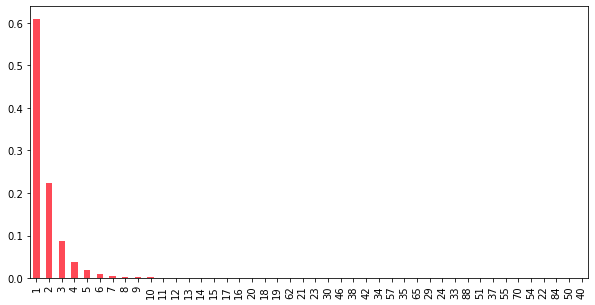

In [ ]:
#Посмотрим на распределение пациентов по количеству посещений
df_visits=df['PatientId'].value_counts().reset_index()

#Для удобства переименуем колонки
df_visits.rename(columns={'index': 'PatientId', 'PatientId': 'Visits'}, inplace=True)

df_visits['Visits'].value_counts(normalize = True).plot.bar(color=('#FE4956'), figsize=(10,5))

df_visits

Text(0.5, 1.0, '30+')

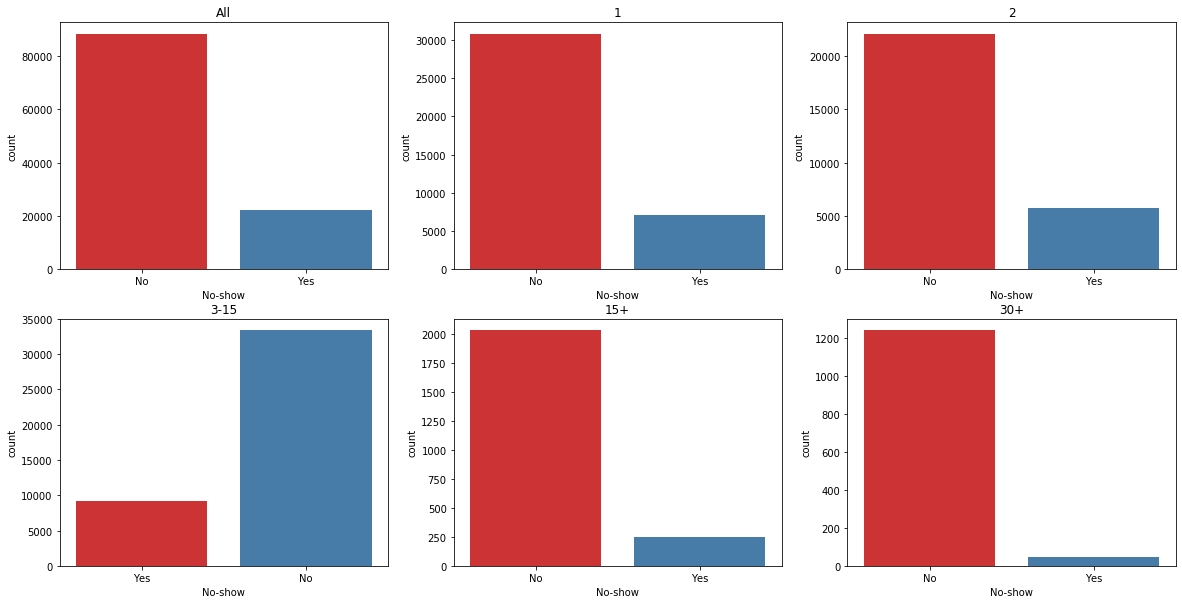

In [ ]:
#Попробуем посмотреть, есть ли отличия между группами котроые были в клинике 1,2,3-157 раз,более 15 раз

df_visits=df['PatientId'].value_counts().reset_index()
df_visits.rename(columns={'index': 'PatientId', 'PatientId': 'Visits'}, inplace=True)

f_visit1=df_visits.query('Visits == 1')
df_filter1 = df['PatientId'].isin(f_visit1['PatientId'])

f_visit2=df_visits.query('Visits == 2')
df_filter2 = df['PatientId'].isin(f_visit2['PatientId'])

f_visit_3_15=df_visits.query('Visits >= 3 & Visits <= 15' )
df_filter_3_15 = df['PatientId'].isin(f_visit_3_15['PatientId'])

f_visit_more15=df_visits.query('Visits > 15' )
df_filter_more15 = df['PatientId'].isin(f_visit_more15['PatientId'])

f_visit_more30=df_visits.query('Visits > 30' )
df_filter_more30 = df['PatientId'].isin(f_visit_more30['PatientId'])

fig, ax =plt.subplots(2,3, figsize=(20,10))
sns.countplot(x=df['No-show'], data=df, ax=ax[0][0], palette='Set1').set_title('All')
sns.countplot(x=df[df_filter1]['No-show'], data=df[df_filter1], ax=ax[0][1], palette='Set1').set_title('1')
sns.countplot(x=df[df_filter2]['No-show'], data=df[df_filter2], ax=ax[0][2], palette='Set1').set_title('2')
sns.countplot(x=df[df_filter_3_15]['No-show'], data=df[df_filter_3_15], ax=ax[1][0], palette='Set1').set_title('3-15')
sns.countplot(x=df[df_filter_more15]['No-show'], data=df[df_filter_more15], ax=ax[1][1], palette='Set1').set_title('15+')
sns.countplot(x=df[df_filter_more30]['No-show'], data=df[df_filter_more30], ax=ax[1][2], palette='Set1').set_title('30+')

## Время посещения

In [ ]:
print('Самая ранняя дата записи в датасете:', df[['ScheduledDay']].min())
print('Самая поздняя дата записи в датасете:',df[['ScheduledDay']].max())
print('Период:', df[['ScheduledDay']].max()-df[['ScheduledDay']].min())

Самая ранняя дата записи в датасете: ScheduledDay   2015-11-10 07:13:56+00:00
dtype: datetime64[ns, UTC]
Самая поздняя дата записи в датасете: ScheduledDay   2016-06-08 20:07:23+00:00
dtype: datetime64[ns, UTC]
Период: ScheduledDay   211 days 12:53:27
dtype: timedelta64[ns]


In [ ]:
print('Самая ранняя дата посещения в датасете:',df[['AppointmentDay']].min())
print('Самая поздняя дата посещения в датасете:',df[['AppointmentDay']].max())
print('Период:',df[['AppointmentDay']].max()-df[['AppointmentDay']].min())

Самая ранняя дата посещения в датасете: AppointmentDay   2016-04-29 00:00:00+00:00
dtype: datetime64[ns, UTC]
Самая поздняя дата посещения в датасете: AppointmentDay   2016-06-08 00:00:00+00:00
dtype: datetime64[ns, UTC]
Период: AppointmentDay   40 days
dtype: timedelta64[ns]


In [ ]:
df['Delay']=(df['AppointmentDay'] - df['ScheduledDay']).dt.days
print('Минимальный промежуток:',df['Delay'].min())
print('Максимальный промежуток:',df['Delay'].max())

Минимальный промежуток: -7
Максимальный промежуток: 178


In [ ]:
#Распределение периода от записи до прихода на прием
df['Delay'].value_counts(normalize = True)

-1      0.348899
 1      0.060840
 3      0.047865
 0      0.047168
 6      0.044391
          ...   
 150    0.000009
 116    0.000009
 126    0.000009
 145    0.000009
 81     0.000009
Name: Delay, Length: 131, dtype: float64

In [ ]:
#Посмотрим в какой день недели и месяц происходит наибольшее количество пропусков посещений

#Добавим колонку с днями недели и месяцами
df['week_appoitntment'] = df['AppointmentDay'].dt.weekday_name
df['month_appoitntment'] = df['AppointmentDay'].dt.month_name()


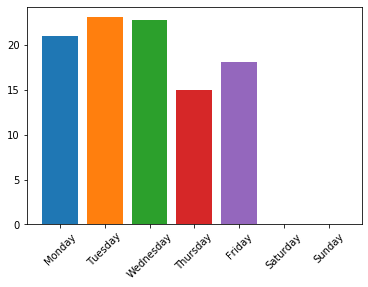

In [ ]:
#Посмотрим на процент неявки по дням недели
df_no_Show=df[df['No-show']=='Yes']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for index,i in enumerate(days):
    tmp_1=df_no_Show[df_no_Show.week_appoitntment==i]
    count=len(tmp_1)
    total_count=len(df_no_Show)
    perc=(count/total_count)*100
    plt.bar(index,perc)

plt.xticks(range(len(days)),days, rotation=45)
plt.show()

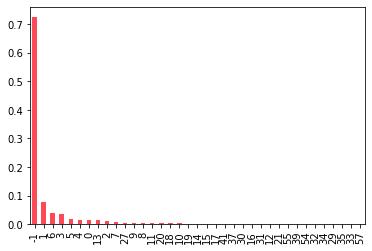

In [ ]:
f_visit_more15=df_visits.query('Visits > 15' )
df_filter_more15 = df['PatientId'].isin(f_visit_more15['PatientId'])
df_15_more=df[df_filter_more15]
df_15_more['Delay'].value_counts(normalize = True).plot.bar(color=('#FE4956'))

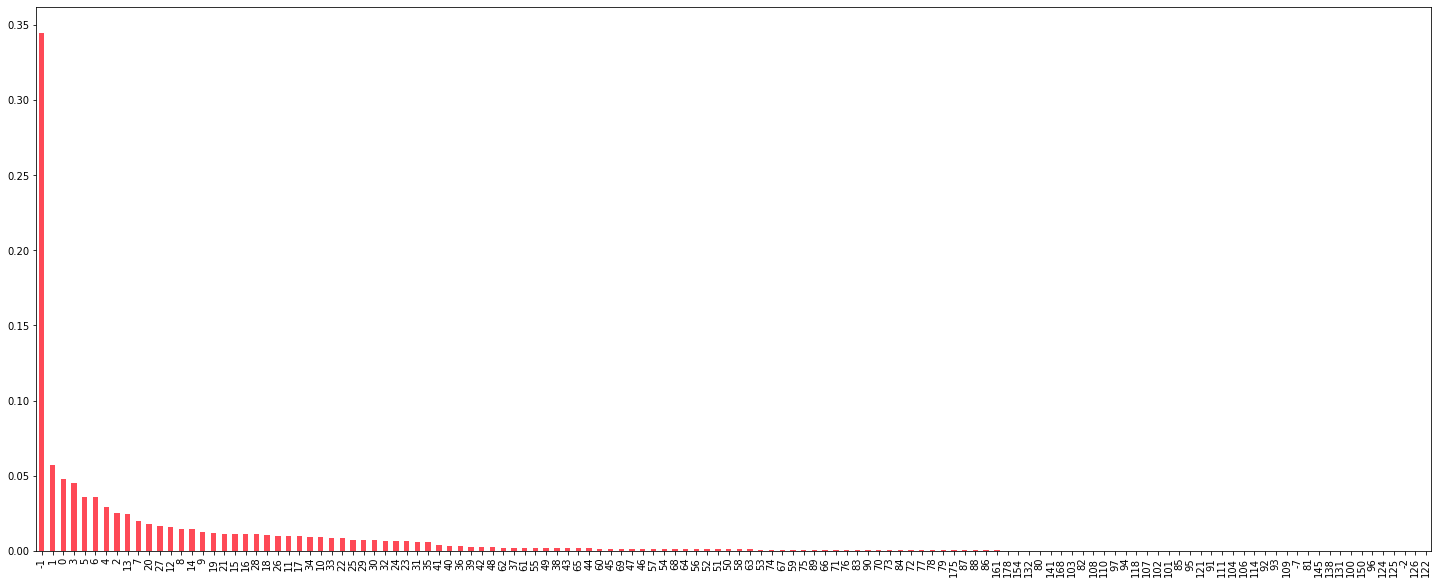

In [ ]:
f_visit_1=df_visits.query('Visits < 5' )
df_filter_1 = df['PatientId'].isin(f_visit_1['PatientId'])
df_1=df[df_filter_1]
df_1['Delay'].value_counts(normalize = True).plot.bar(figsize=(25,10), color=('#FE4956'))

Text(0.5, 1.0, '-1')

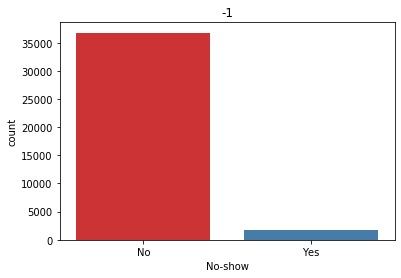

In [ ]:
df_d00=df[df['Delay'] <= -1]
sns.countplot(x=df_d00['No-show'], data=df, palette='Set1').set_title('-1')

Text(0.5, 1.0, '>1')

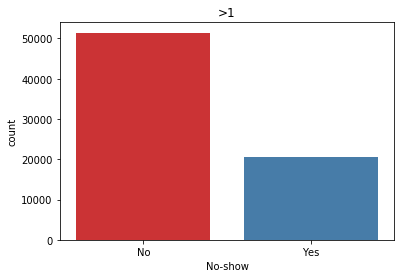

In [ ]:
df_d2=df[df['Delay'] > -1]
sns.countplot(x=df_d2['No-show'], data=df, palette='Set1').set_title('>1')

Похоже что записи с -1 днем ожидания это те кто находился в больнице или были приняты немедленно и оформленны "задним числом" (неявка по ним значительно меньше тех кто приходил через некоторое время после записи), записи временем ожидания меньше -1 вероятно ошибочны


## Возраст

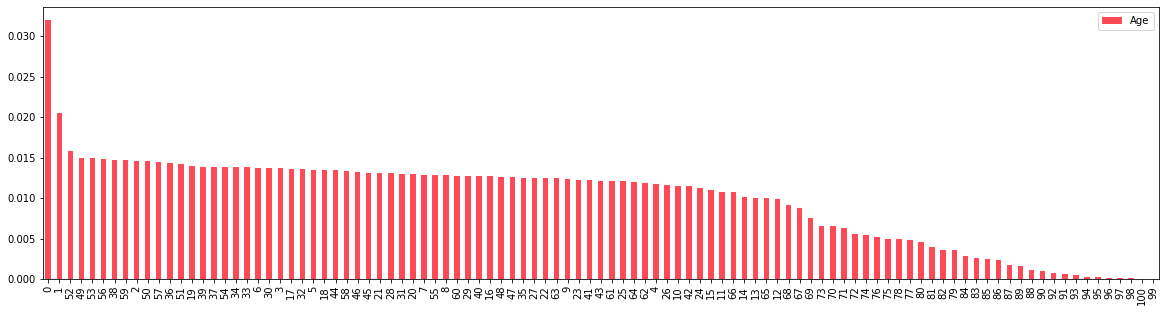

In [ ]:
df.Age.value_counts(normalize = True).plot.bar(figsize=(20,5),color=('#FE4956')).legend()

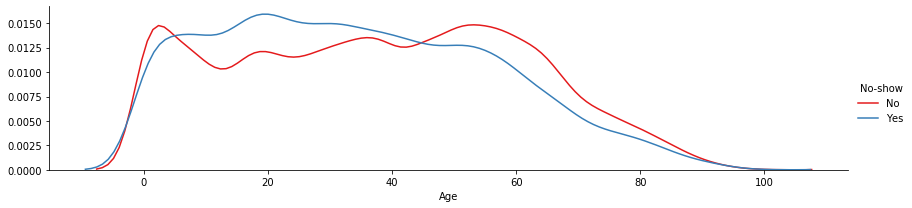

In [ ]:
fig = sns.FacetGrid(df, hue ='No-show', aspect = 4,palette='Set1')
fig.map(sns.kdeplot, 'Age')
fig.add_legend()

## Пол

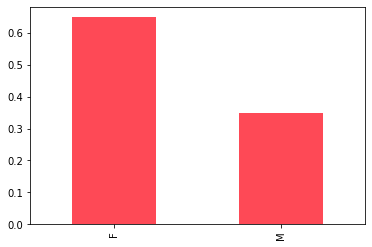

In [ ]:
df['Gender'].value_counts(normalize=True).plot.bar(color=('#FE4956'))

In [ ]:
M_p=(df[(df['Gender']=='M') & (df['No-show']=='Yes')].count() / len((df['Gender']=='M')))*100
print('Доля неявки у мужчин:', M_p['Gender'])

F_p=(df[(df['Gender']=='F') & (df['No-show']=='Yes')].count() / len((df['Gender']=='F')))*100
print('Доля неявки у женщин:', F_p['Gender'])

Доля неявки у мужчин: 6.989748369058714
Доля неявки у женщин: 13.202254815914005


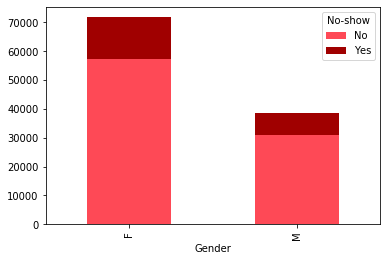

In [ ]:
df.groupby(['Gender', 'No-show'])['Gender'].count().unstack('No-show').plot(kind='bar', stacked=True, color=('#FE4956', '#A00000'))

## Параметры здоровья

Text(0.5, 1.0, 'Alcoholism')

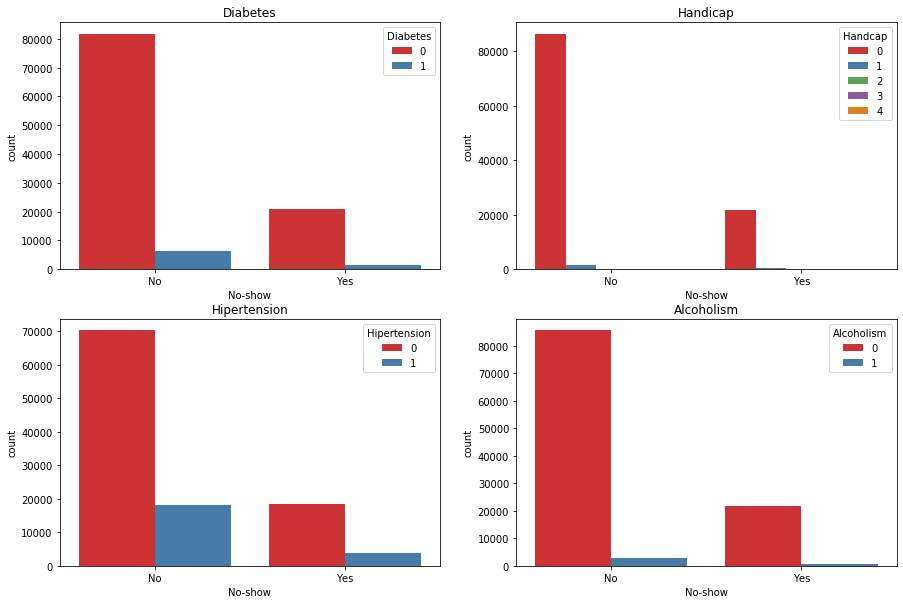

In [ ]:
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.countplot(x='No-show', hue='Diabetes', data=df, ax=ax[0][0], palette='Set1').set_title('Diabetes')
sns.countplot(x='No-show', hue='Handcap', data=df, ax=ax[0][1], palette='Set1').set_title('Handicap')
sns.countplot(x='No-show', hue='Hipertension', data=df, ax=ax[1][0], palette='Set1').set_title('Hipertension')
sns.countplot(x='No-show', hue='Alcoholism', data=df, ax=ax[1][1], palette='Set1').set_title('Alcoholism')

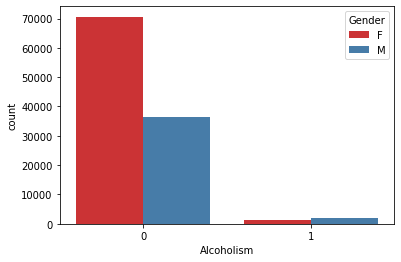

In [ ]:
sns.countplot(data=df, x='Alcoholism', hue='Gender',palette='Set1');


## Гос. пособие

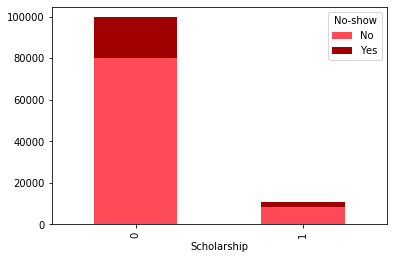

In [ ]:
df.groupby(['Scholarship', 'No-show'])['Scholarship'].count().unstack('No-show').plot(kind='bar', stacked=True, color=('#FE4956', '#A00000'))

## SMS уведомления

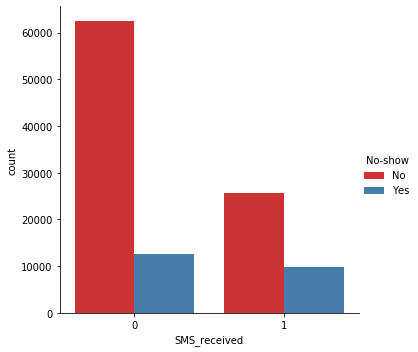

In [ ]:
sns.catplot('SMS_received', hue='No-show', data=df, kind='count',palette='Set1')


## Локация 

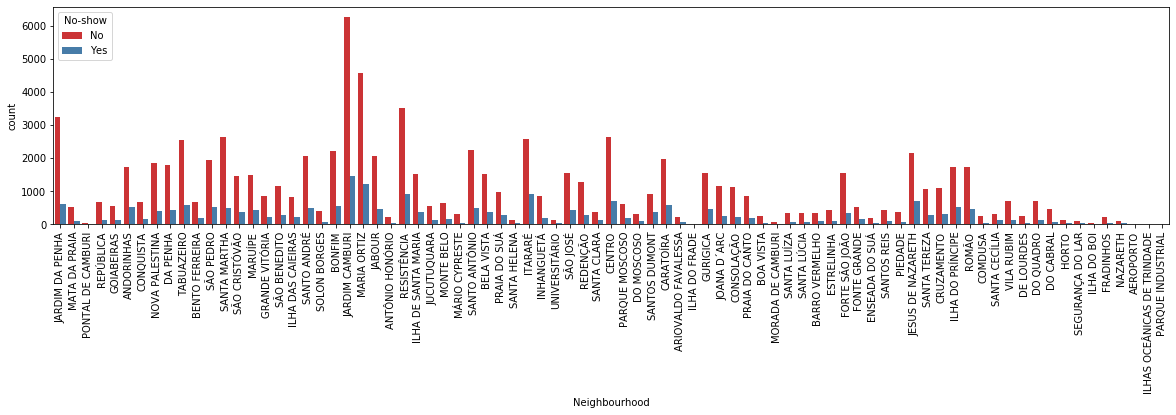

In [ ]:
#Посмотрим на распределение посещений/непосещений по локациям
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
ax  = sns.countplot(df['Neighbourhood'],hue = df['No-show'], palette='Set1')
plt.show()

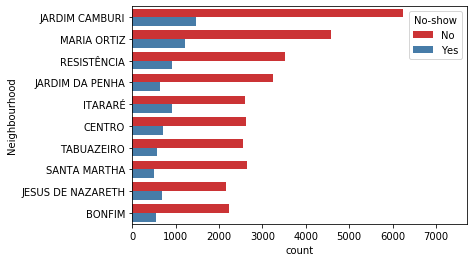

In [ ]:
neighbourhood_counts = df['Neighbourhood'].value_counts()
neighbourhood_order = neighbourhood_counts.index
plt.xlim(0,df['Neighbourhood'].value_counts().max())
sns.countplot(data = df, y = 'Neighbourhood', hue='No-show', order = neighbourhood_order[:10], palette='Set1')